###Подгрузка датасета

In [ ]:
!gdown --id 1I7w6Y4xcPmsA-rYLhhkCJupglvGN8Eg2

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1I7w6Y4xcPmsA-rYLhhkCJupglvGN8Eg2
To: /content/GROOPBYCHECROI.csv
100% 1.26M/1.26M [00:00<00:00, 44.5MB/s]


In [ ]:
import pandas as pd
import pathlib
from pathlib import Path

In [ ]:
dataset = pd.read_csv('GROOPBYCHECROI.csv') #подругрузка файла

Команды для отображения всех строк датасета

In [ ]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)

# Анализ данных

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   886 non-null    object 
 1   name_school            886 non-null    object 
 2   price all              886 non-null    int64  
 3   price sellary          886 non-null    int64  
 4   kredit_v_monce         886 non-null    int64  
 5   dlitelnost             886 non-null    object 
 6   tip_prof               886 non-null    object 
 7   ocenka                 886 non-null    object 
 8   plus                   738 non-null    object 
 9   minus                  737 non-null    object 
 10  uroven_podgotovki      728 non-null    object 
 11  komu                   880 non-null    object 
 12  chemy_nauchitsy        536 non-null    object 
 13  programm               606 non-null    object 
 14  napravleniya           886 non-null    object 
 15  tehnol

В файле имеется 886 курсов, которые представлены типом данных object, числовые данные представлены типом данных int, что нам подходит для анализа числовых и категориальных данных в датасете

In [ ]:
dataset.isna().sum()

name                       0
name_school                0
price all                  0
price sellary              0
kredit_v_monce             0
dlitelnost                 0
tip_prof                   0
ocenka                     0
plus                     148
minus                    149
uroven_podgotovki        158
komu                       6
chemy_nauchitsy          350
programm                 280
napravleniya               0
tehnologii               128
soft_skills               68
name_all                   0
Средняя цена за курсы      0
dtype: int64

Мы имеем пустые строки: плюсы, миусы, уровень подготовки, чему научатся студенты, программа курса, технологии и навыки. Это обусловлено тем, что некоторые агрегаторы курсов не заполнили двнные пункты.

In [ ]:
dataset.isna().mean()*100

name                      0.000000
name_school               0.000000
price all                 0.000000
price sellary             0.000000
kredit_v_monce            0.000000
dlitelnost                0.000000
tip_prof                  0.000000
ocenka                    0.000000
plus                     16.704289
minus                    16.817156
uroven_podgotovki        17.832957
komu                      0.677201
chemy_nauchitsy          39.503386
programm                 31.602709
napravleniya              0.000000
tehnologii               14.446953
soft_skills               7.674944
name_all                  0.000000
Средняя цена за курсы     0.000000
dtype: float64

В процетом соотошении наибольшее отуствие данных наблюдается в программах и чему научатся студенты. Скорее всего данные параметры не указанны.

# Анализ курсов по категориям

###Курсы по направлениям

In [ ]:
dataset['name_all'].value_counts()

SMM                                          57
Аналитик данных                              55
Product Manager                              55
3D дизайн                                    43
Интернет маркетолог                          41
Python разработчик                           34
Веб-дизайнер                                 31
Специалист SEO                               31
Тестировщик                                  29
Data Scientist                               28
Художник                                     27
UX/UI дизайнер                               24
Бизнес-аналитик                              24
WEB разработчик                              24
гейм-дизайн                                  23
DevOps                                       22
Дизайнер интерьеров                          19
Разработчик Java                             19
Power-bi                                     18
Системный администратор                      18
JavaScript разработчик                  

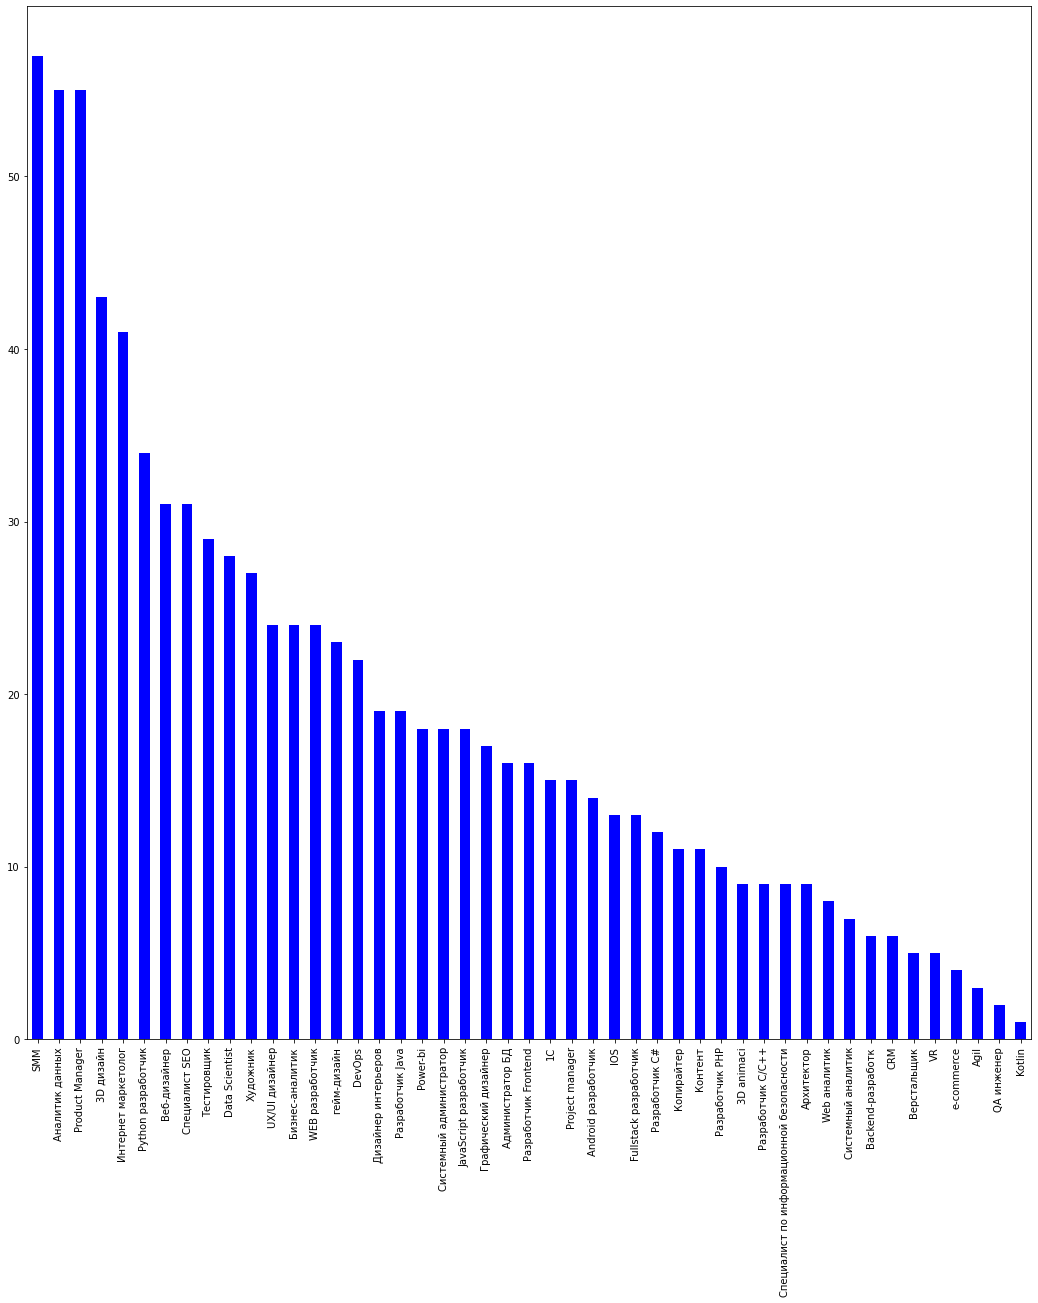

In [ ]:
dataset['name_all'].value_counts().head(49).plot.bar( color='b',figsize=(18, 19))

По курсам совсем иная картина чем с вакансиями, наибольшее число курсов приходится на SMM, хотя востребованость на рынке труда небольшая. SMM популярен в соц.сетях и в блогерстве, и возможно, данные вакансии не попадают в выборку, т.к. в данном направлении ищут работу в основном фрилансеры. Аналитик данных так же является большой категорией курсов, что совпадает по востребованости на рынке труда. А вот курсов по 1С достаточо мало, несмотря на то, что это самая востребованная профессия(много вакансий).

###Агрегаторы

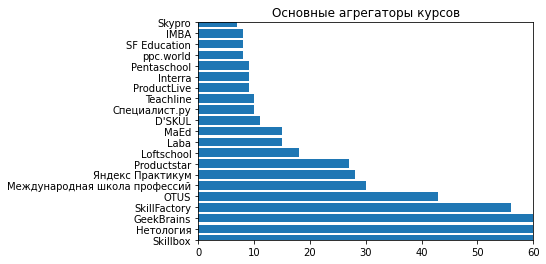

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#количество курсов по школам
type_counts = dataset['name_school'].value_counts()
plt.barh(type_counts.index, type_counts.values)
plt.xlim((None,60))
plt.ylim((0,20))
plt.title('Основные агрегаторы курсов')
plt.yticks(ha = 'right')
plt.show()

Самыми популярыми школами являются Skillbox, Нетология, GeekBrains, SkillFactory.

In [ ]:
type_counts = dataset['name_school'].value_counts()

In [ ]:
other_types = type_counts[type_counts<15]
type_counts = type_counts[type_counts>15]

In [ ]:
type_counts['Другие'] = other_types.sum()

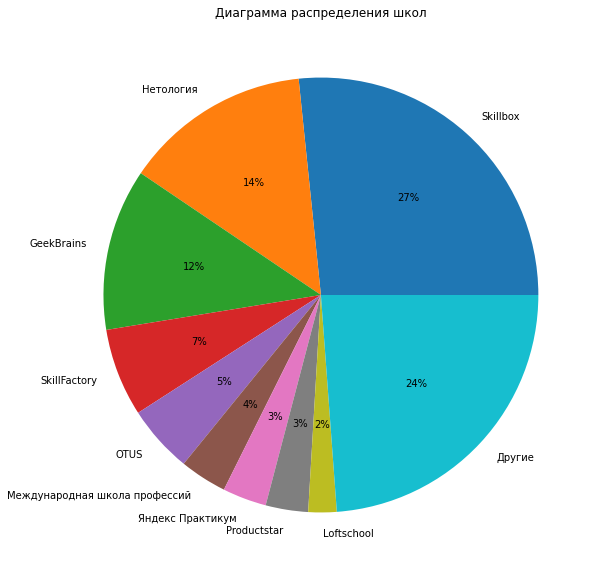

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Диаграмма распределения школ')
plt.pie(type_counts,autopct='%1.0f%%',labels = type_counts.index)
plt.show()


Большая доля рынка принадлежит Skillbox, Нетология, GeekBrains, SkillFactory.

##Анализ стоимости курсов

###Сравнение цен

In [ ]:
#Средняя стомость курсов по категориям
means = dataset.groupby('name_all')['price all','price sellary','kredit_v_monce'].mean()
means


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,price all,price sellary,kredit_v_monce
name_all,,,
1C,101828.133333,62989.733333,7894.400000
3D animaci,61560.111111,24183.888889,23074.000000
3D дизайн,108389.953488,62053.441860,4542.279070
Agil,24473.333333,13486.666667,5955.666667
Android разработчик,115876.857143,72004.285714,5171.928571
Backend-разработк,161092.000000,99242.333333,3486.166667
CRM,35750.000000,19145.833333,5547.000000
Data Scientist,205067.928571,90614.357143,11255.571429
DevOps,149139.409091,75592.636364,5108.272727


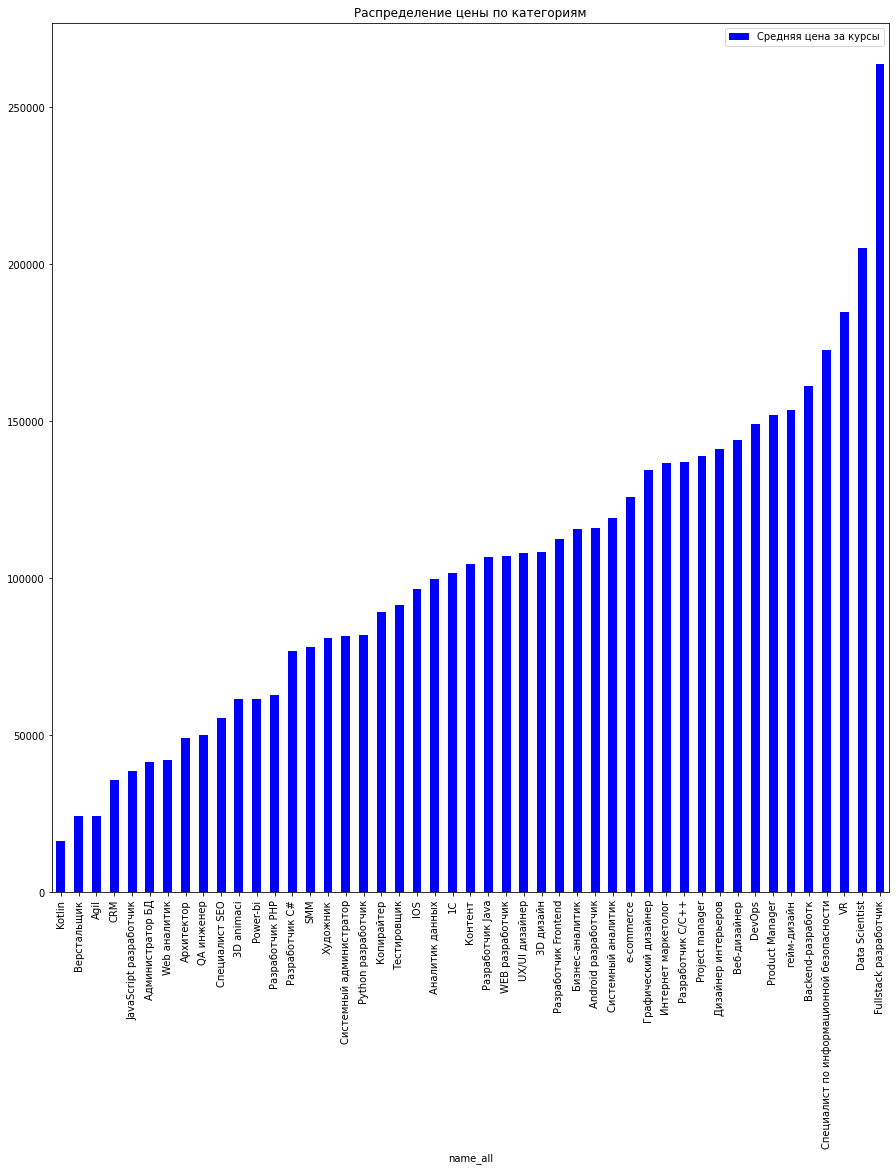

In [ ]:
dataset[['name_all',"price all"]]
dataset["Средняя цена за курсы"]=dataset[["price all"]].mean(axis='columns')
a=dataset[['name_all',"Средняя цена за курсы"]]
y=a.groupby(['name_all']).agg({"Средняя цена за курсы":"mean"}).sort_values("Средняя цена за курсы").plot.bar(color='b',figsize=(15, 16), title="Распределение цены по категориям")



Самыми дорогими по стоимости курсами являются Fullstack, Data Scientist, VR, Кибербезопасность.

In [ ]:
# max,min стоимость по категориям
max = dataset.groupby('name_all')['price all','price sellary','kredit_v_monce'].max()
max

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,price all,price sellary,kredit_v_monce
name_all,,,
1C,182500,130875,37550
3D animaci,250341,150205,137500
3D дизайн,324847,194908,10877
Agil,57800,40460,11970
Android разработчик,242400,168375,15900
Backend-разработк,375012,225000,6250
CRM,120000,72000,16000
Data Scientist,1200000,224595,90000
DevOps,350578,210347,19000


In [ ]:
min = dataset.groupby('name_all')['price all','price sellary','kredit_v_monce'].min()

min

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,price all,price sellary,kredit_v_monce
name_all,,,
1C,36000,0,0
3D animaci,4350,0,1498
3D дизайн,0,0,0
Agil,3650,0,2247
Android разработчик,15000,0,0
Backend-разработк,35500,24850,2000
CRM,6000,0,1700
Data Scientist,9900,0,1954
DevOps,3000,0,0


In [ ]:
dataset.describe()

,price all,price sellary,kredit_v_monce,Средняя цена за курсы
count,8.860000e+02,886.000000,886.000000,8.860000e+02
mean,1.095925e+05,54747.909707,6902.727991,1.095925e+05
std,1.152961e+05,59519.925422,9570.380961,1.152961e+05
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,3.555000e+04,0.000000,2682.500000,3.555000e+04
50%,7.500000e+04,35595.000000,4450.000000,7.500000e+04
75%,1.500000e+05,89700.000000,6892.750000,1.500000e+05
max,1.200000e+06,510300.000000,137500.000000,1.200000e+06


###Скидки на обучение

In [ ]:
dataset["price sellary"].value_counts()

0         252
34900      13
6800       10
168750      8
90000       7
         ... 
19800       1
49830       1
10000       1
32900       1
152870      1
Name: price sellary, Length: 418, dtype: int64

В 252 курсах агрегаторы не предоставляют скидки.

In [ ]:
curs=dataset.loc[dataset['price sellary'] == 0 , ['name_school']]
curs.value_counts()

name_school                   
GeekBrains                        55
OTUS                              34
Яндекс Практикум                  28
Laba                              14
Нетология                         12
Специалист.ру                     10
SF Education                       8
SkillFactory                       7
ProductLive                        7
robot_dreams                       6
SKVOT                              6
ppc.world                          5
CGTarian                           5
MDA                                4
Среда обучения                     4
ConvertMonster                     4
Teachline                          4
Skillsetter                        3
Skypro                             3
Hedu                               3
MasterBrand                        2
WebPromoExperts                    2
XYZ School                         2
Contented                          2
Skillbox                           2
Interra                            1
Udemy  

Самое большое количество курсов не предоставляющих скидку у: GeekBrains-55,  OTUS-34, Яндекс Практикум-28, Laba-14, Нетология-12, Специалист.ру-10.

###Рассрочка

In [ ]:
curs=dataset.loc[dataset['kredit_v_monce'] == 0 , ['name_school']]
curs.value_counts()

name_school   
GeekBrains        42
Нетология          6
SkillFactory       4
Skillbox           2
Interra            1
OTUS               1
Rush Media         1
Среда обучения     1
dtype: int64

В 58 курсах нет рассрочки. Наибольшее число курсов без рассрочки у GeekBrains-42

###Длительность курсов

In [ ]:
# длительность курсов
dlit = dataset.groupby('name_all')['name','name_all','dlitelnost']
dlit.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,name,name_all,dlitelnost
0,Профессия «С#-разработчик» от Skillbox,Разработчик С#,12 месяцев
1,Профессия «Fullstack-разработчик на JavaScript...,Fullstack разработчик,12 месяцев
2,Факультет информационной безопасности от GeekB...,Специалист по информационной безопасности,24 месяца
3,Профессия «SEO-специалист с нуля до PRO» от Sk...,Специалист SEO,18 месяцев
4,Факультет продуктовой аналитики от GeekBrains,Product Manager,12 месяцев
...,...,...,...
597,"Курс «Управление по Agile: Scrum, Kanban, Lean...",Agil,4 месяца
609,Курс «Веб-аналитик с нуля до Junior» от Skillbox,Web аналитик,5 месяцев
628,Курс «QA lead» от OTUS,QA инженер,6 месяцев
635,Курс «Веб-аналитика от Ingate» от Skillbox,Web аналитик,6 месяцев


In [ ]:
dataset["dlitelnost"].value_counts()

 4 месяца      161
 1 месяц       138
 12 месяцев    137
 2 месяца       95
 6 месяцев      90
 3 месяца       50
 24 месяца      50
 5 месяцев      35
 8 месяцев      23
 18 месяцев     18
 9 месяцев      18
 10 месяцев     13
 16 месяцев     10
 7 месяцев       9
 11 месяцев      8
 15 месяцев      7
 14 месяцев      6
 17 месяцев      4
 20 месяцев      4
 22 месяца       2
 19 месяцев      2
 54 месяца       2
 23 месяца       1
 30 месяцев      1
 13 месяцев      1
 48 месяцев      1
Name: dlitelnost, dtype: int64

При анализе длительности курсов видно, что наибольшее количество курсов представленно в категории 4 месяца - 161, 1 месяц-138, 12 месяцев - 137.

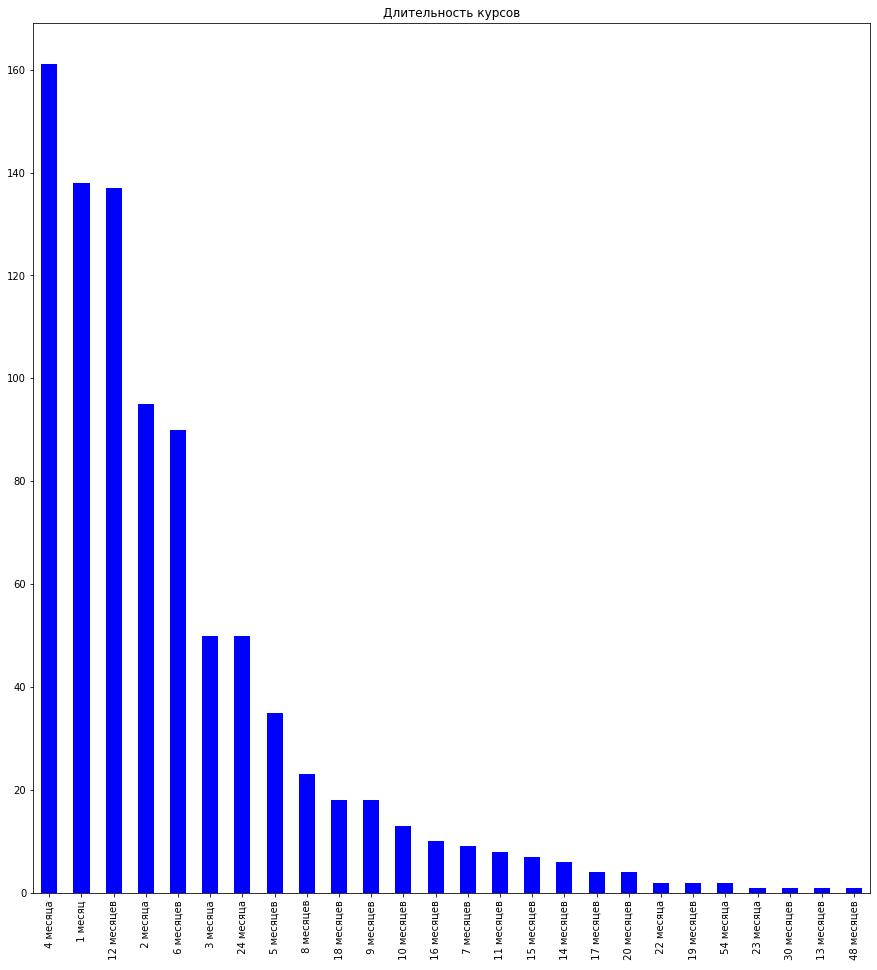

In [ ]:
dataset["dlitelnost"].value_counts().plot.bar( color='b',figsize=(15, 16), title="Длительность курсов")

In [ ]:
import pathlib
from pathlib import Path

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/hist.py:382: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03325078d0>,
      dtype=object)

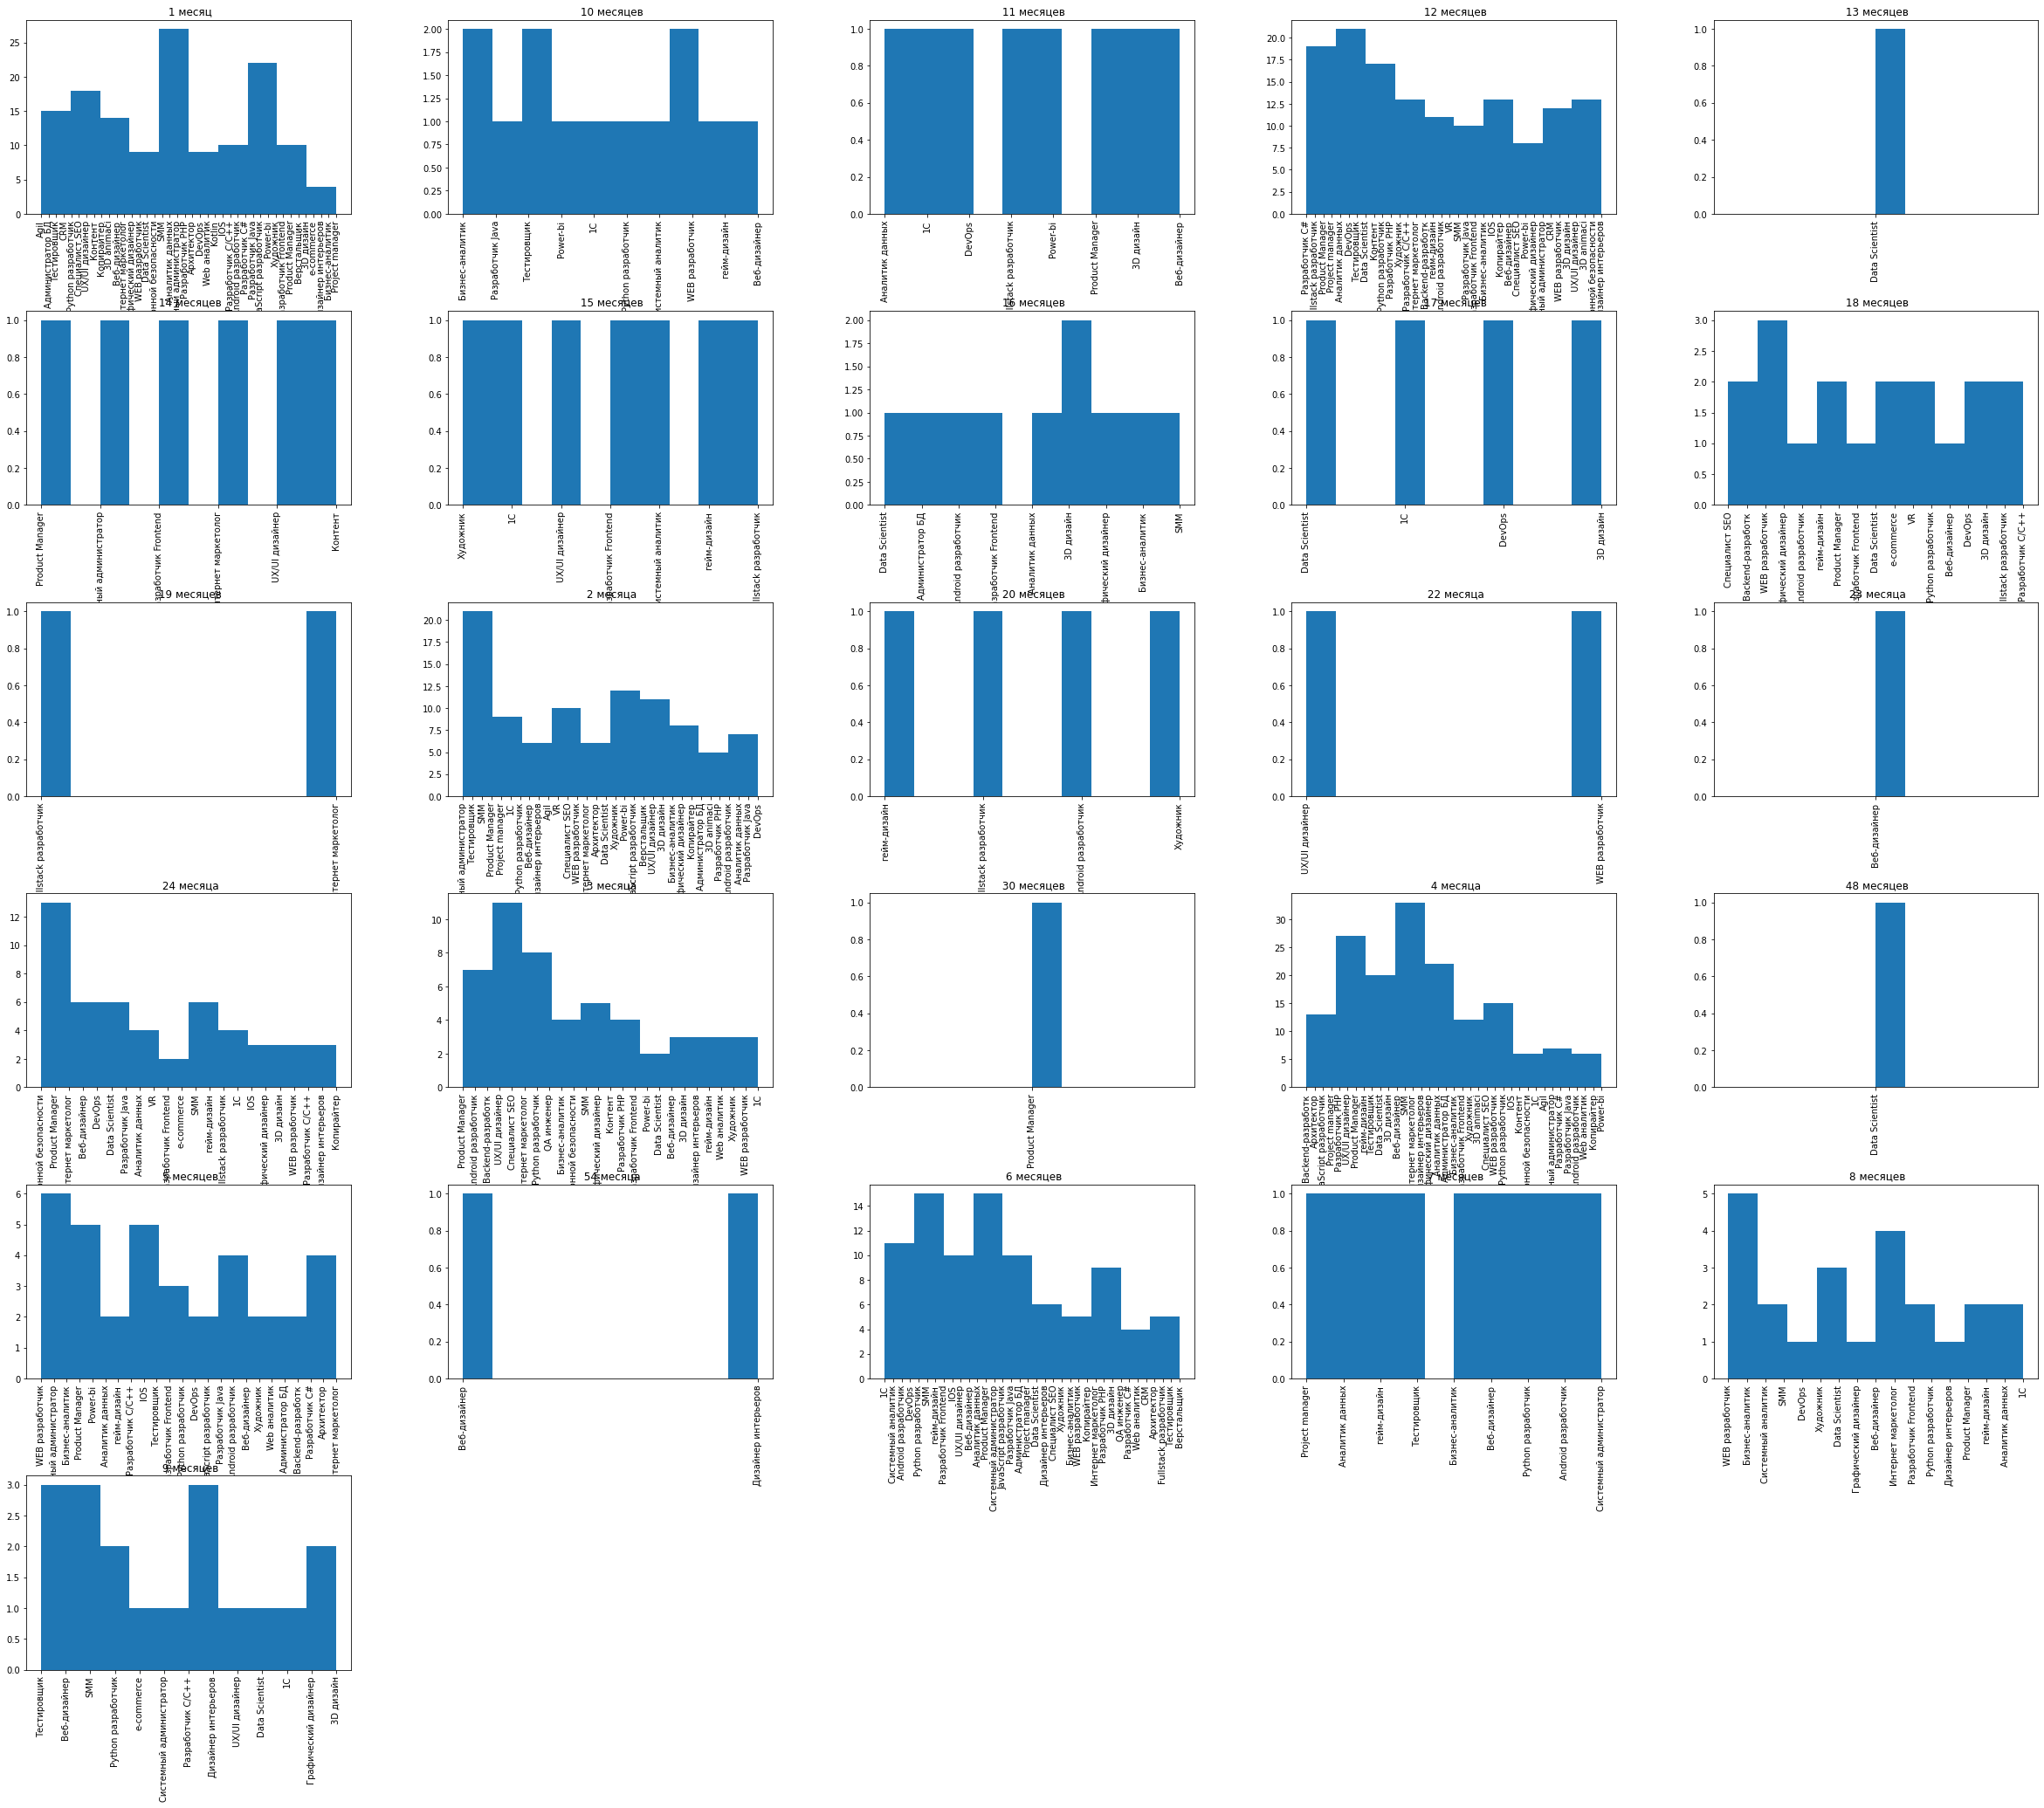

In [ ]:

fig = plt.figure(figsize = (40,35))
ax = fig.gca()
dataset['name_all'].hist(by=dataset['dlitelnost'],ax=ax)

По сгруппированным данным видно, что самые долгие курсы-курсы дизайнеров, непродолжительные курсы есть практически по всем направлениям.

###Направления подготовки

In [ ]:
dataset["tip_prof"].value_counts()

Программирование,Backend-разработка                                                                          43
Аналитика,Аналитика данных                                                                                   38
Программирование,Администрирование и DevOps                                                                  26
Прикладное искусство,Дизайн интерьеров                                                                       26
Программирование,Frontend-разработка                                                                         26
                                                                                                             ..
Маркетинг,Email-маркетинг,SMM,Контекстная реклама,Таргетированная реклама                                     1
Дизайн,3D-анимация,3D-графика                                                                                 1
Программирование,Backend-разработка,Fullstack-разработка,Алгоритмы и структуры данных                   

По анализу направлений подготовки большинство курсов расчитано на Программирование и Аналитику, Инженерию.

###Рейтинг курсов

In [ ]:
dataset["ocenka"].value_counts()

8/10      77
9/10      61
8.8/10    57
10/10     54
9.2/10    52
7.3/10    51
7.7/10    49
7/10      39
8.5/10    37
6.3/10    27
8.3/10    27
8.2/10    26
8.7/10    23
7.8/10    23
6.7/10    23
6/10      21
9.4/10    20
8.6/10    19
9.6/10    19
9.5/10    18
9.3/10    18
8.4/10    18
9.8/10    16
7.5/10    16
6.8/10    11
9.7/10    11
7.6/10    10
7.2/10     7
5/10       7
6.5/10     7
4/10       6
5.7/10     6
5.3/10     4
6.6/10     4
4.3/10     4
5.2/10     3
7.4/10     3
3.7/10     2
6.2/10     2
5.8/10     2
4.7/10     2
5.4/10     1
5.5/10     1
4.6/10     1
8.1/10     1
Name: ocenka, dtype: int64

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/hist.py:382: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0334770150>,
      dtype=object)

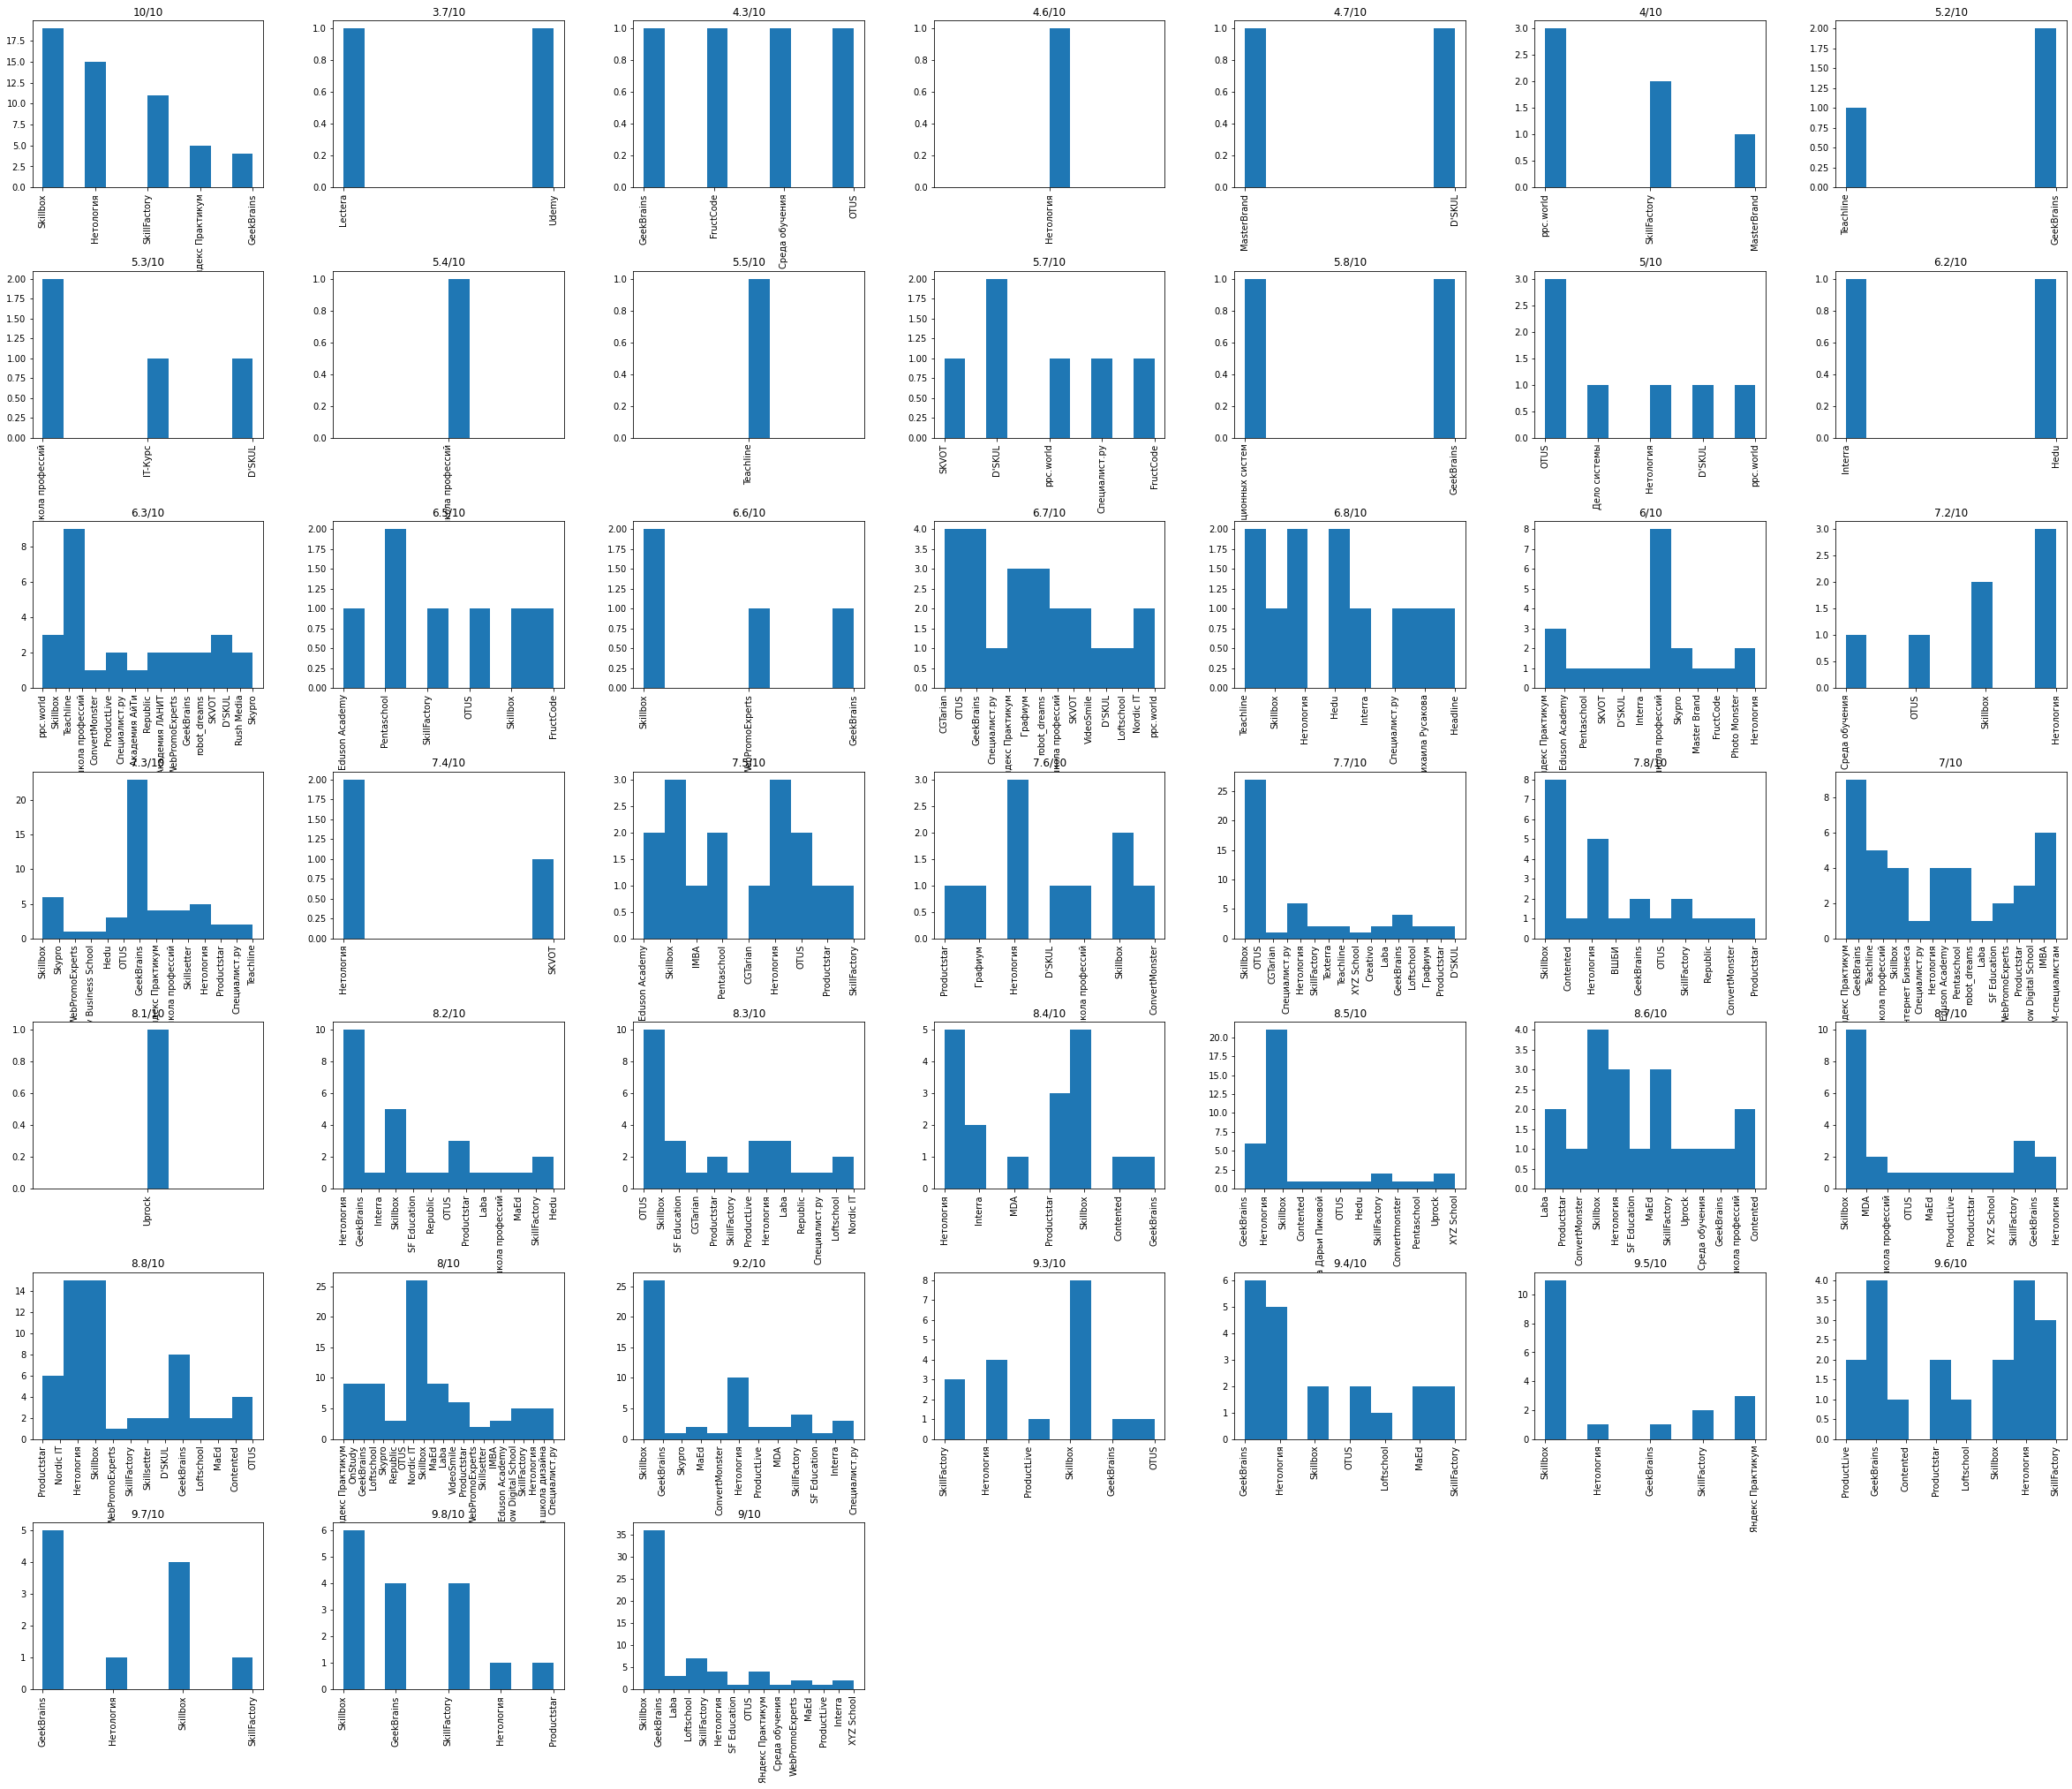

In [ ]:
fig = plt.figure(figsize = (40,35))
ax = fig.gca()
dataset['name_school'].hist(by=dataset['ocenka'],ax=ax)

По анализу рейтинга(оценок) пользователей можно увидеть, что самый низкий рейтинг у Lectera и Uderny, но это не может однозначно характеризовать школу и обучение в ней, так как может быть оставлен всего один отзыв.

###Плюсы и минусы

In [ ]:
dataset["plus"].value_counts()

диплом портфолио упор на практику дополнительные материалы доступ навсегда                                                                                                                   8
диплом; гарантия возврата денег в течение 14 дней; возможность вернуть 13% через налоговый вычет.                                                                                            6
помощь в трудоустройстве; диплом; возможность вернуть 13% через налоговый вычет.                                                                                                             6
диплом.                                                                                                                                                                                      6
диплом возврат 13% через налоговый вычет                                                                                                                                                     5
                                             

Много плюсов у курсов, 664 уникальных положительных направления:наличие диплома об окончании, практика, гарантия возврата денег.

In [ ]:
dataset["minus"].value_counts()

высокая стоимость                                                                   100
нет индивидуальных консультаций                                                      92
нет гарантий трудоустройства; нет индивидуальных консультаций с преподавателем.      50
нет живых вебинаров                                                                  45
нет гарантий трудоустройства.                                                        36
                                                                                   ... 
высокая стоимость необходимо очное присутствие на госаттестации и защите диплома      1
нет личного наставника высокая стоимость                                              1
нет возврата денег через налоговый вычет высокая стоимость                            1
дорогой курс (но оно того стоит ).                                                    1
высокая стоимость (но оно того стоит).                                                1
Name: minus, Length: 160, dtype:

В 100 курсах указанна не оправданно высокая стоимость, отсутствие индивидуальных консультаций, нет гарании трудоустройства, обучение только в записи.

###Уровень подготовки

In [ ]:
dataset["uroven_podgotovki"].value_counts()

Новичкам,Маркетологам,Предпринимателям        22
Новичкам                                      16
Новичкам,Веб-разработчикам                    14
Разработчикам                                 14
Новичкам,Программистам                        13
                                              ..
Аналитикам,Продакт-менеджерам,Маркетологам     1
Новичкам,Иллюстраторам,Дизайнерам              1
Разработчикам,Аналитикам                       1
Новичкам,Бизнесменам,Фрилансерам               1
Новичкам,Начинающим,Профессионалам             1
Name: uroven_podgotovki, Length: 500, dtype: int64

Большинство курсов расчитанно на новичков, но по анализу вакансий картина обратная-требуются сотрудники,которые имеют опыт работы, пусть даже минимальный.

In [ ]:
uroven_podgotovki = dataset["uroven_podgotovki"].str.translate({ord(i): None for i in "[]''"})#разделяем навыки
uroven_podgotovki = uroven_podgotovki.str.split(',',expand = True)
#uroven_podgotovki

In [ ]:
uroven_podgotovki.columns=['uroven_podgotovki1','uroven_podgotovki2','uroven_podgotovki3','uroven_podgotovki4']
#uroven_podgotovki

In [ ]:
final_df = pd.concat([dataset,uroven_podgotovki],axis=1) #объединяем два датафрейма
#final_df

In [ ]:
final_df = final_df.drop(['uroven_podgotovki'] ,axis=1)#удаляем лишнее
#final_df

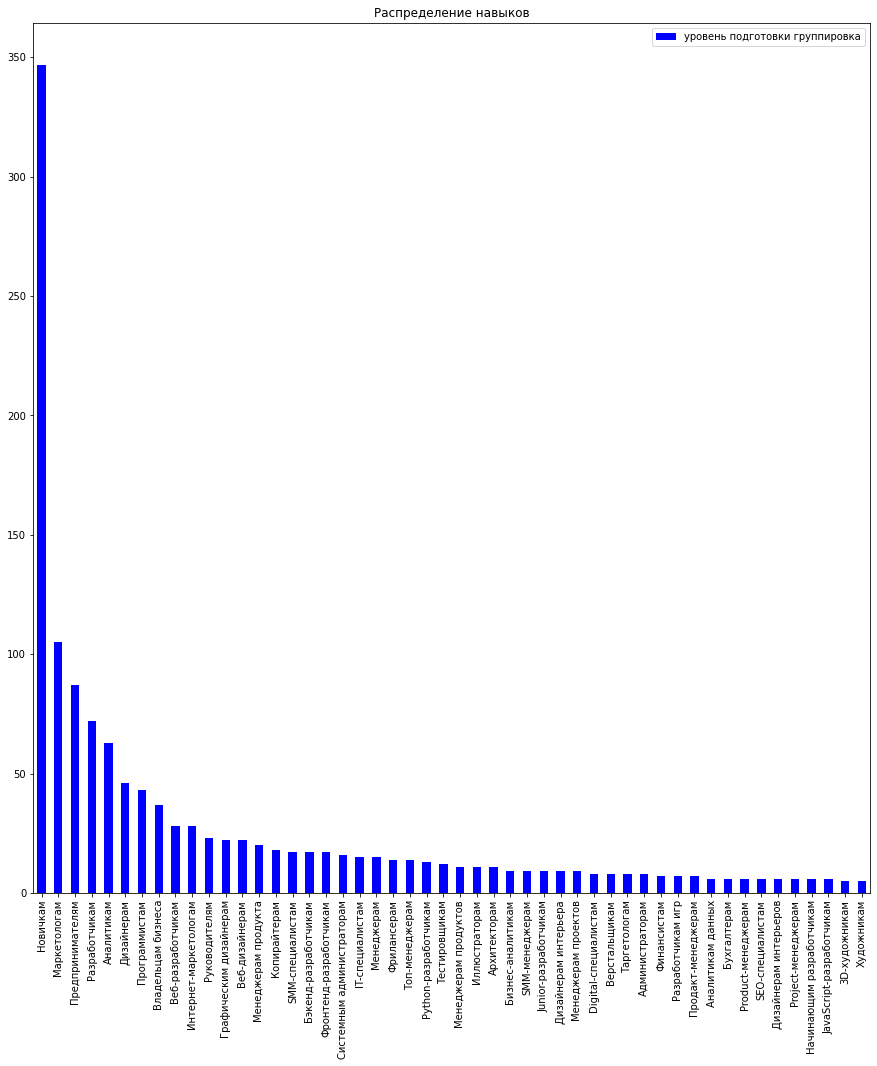

In [ ]:
podgotovka=final_df[['uroven_podgotovki1','uroven_podgotovki2','uroven_podgotovki3','uroven_podgotovki4']].apply(pd.Series.value_counts)
podgotovka['уровень подготовки группировка'] = podgotovka.sum(axis=1)
sorted_dataset = podgotovka.sort_values('уровень подготовки группировка',ascending=False)
sorted_dataset[['уровень подготовки группировка']].head(50).plot.bar( color='b',figsize=(15, 16), title="Распределение навыков")

В целом видно, что большинство курсов расчитанно на новичков, но надо смотреть в разрезе каждого направления для более детального анализа.


###Детальный анализ

####Технологии

In [ ]:
final_df["tehnologii"].value_counts()

Microsoft Excel                                                                                                                                     10
Adobe Photoshop                                                                                                                                      9
Figma                                                                                                                                                8
Unity 3D                                                                                                                                             6
Adobe Illustrator                                                                                                                                    6
                                                                                                                                                    ..
AWS,Azure,Docker,Git,Google Cloud Platform,Grafana,Kubernetes,Prometheus,Terraform            

In [ ]:
tehnologii = final_df["tehnologii"].str.translate({ord(i): None for i in "[]''"})#разделяем навыки
tehnologii = tehnologii.str.split(',',expand = True)
#tehnologii

In [ ]:
tehnologii.columns=['tehno1','tehno2','tehno3','tehno4','tehno5','tehno6','tehno7','tehno8','tehno9','tehno10','tehno11','tehno12','tehno13','tehno14','tehno15','tehno16','tehno17','tehno18','tehno19','tehno20','tehno21','tehno22','tehno23','tehno24']
#tehnologii

In [ ]:
data_df = pd.concat([final_df,tehnologii],axis=1) #объединяем два датафрейма
#data_df

In [ ]:
data_df = data_df.drop(['tehnologii'] ,axis=1)#удаляем лишнее
#data_df

In [ ]:
#data_df.info()

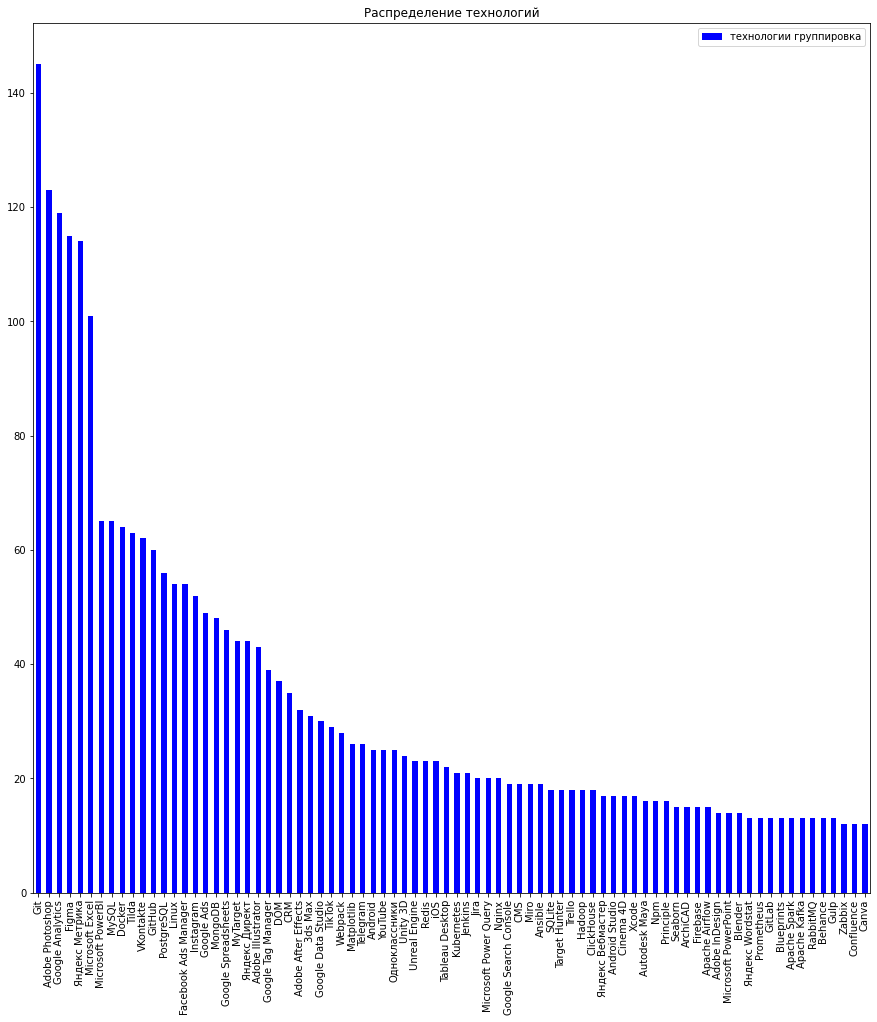

In [ ]:
tehno=data_df[['tehno1','tehno2','tehno3','tehno4','tehno5','tehno6','tehno7','tehno8','tehno9','tehno10','tehno11','tehno12','tehno13','tehno14','tehno15','tehno16','tehno17','tehno18','tehno19','tehno20','tehno21','tehno22','tehno23','tehno24']].apply(pd.Series.value_counts)
tehno['технологии группировка'] = tehno.sum(axis=1)
sorted_dataset = tehno.sort_values('технологии группировка',ascending=False)
sorted_dataset[['технологии группировка']].head(80).plot.bar( color='b',figsize=(15, 16), title="Распределение технологий")

####Soft skills

In [ ]:
data_df["soft_skills"].value_counts()


Воронка продаж,Контент-план,Медиаплан,Настройка рекламных кампаний                                             8
А/B-тестирование                                                                                               8
C++                                                                                                            7
C#                                                                                                             6
Контент-план,Разведывательный анализ,Юзабилити-тесты                                                           5
                                                                                                              ..
Композиция,Работа с текстурой                                                                                  1
API,JSON,Pandas,Python,А/B-тестирование                                                                        1
Брендинг,Дистрибуция контента,Контент-план,Монтаж видео,Настройка рекламных кампаний,Промоушен,С

In [ ]:
soft_skills = data_df["soft_skills"].str.translate({ord(i): None for i in "[]''"})#разделяем навыки
soft_skills = soft_skills.str.split(',',expand = True)
#soft_skills

In [ ]:
soft_skills.columns=['skills1','skills2','skills3','skills4','skills5','skills6','skills7','skills8','skills9','skills10','skills11','skills12','skills13','skills14','skills15','skills16','skills17','skills18','skills19','skills20','skills21','skills22','skills23','skills24','skills25','skills26','skills27','skills28','skills29','skills30','skills31','skills32','skills33']
#soft_skills

In [ ]:
all_df = pd.concat([data_df,soft_skills],axis=1) #объединяем два датафрейма
#all_df

In [ ]:
all_df =all_df.drop(['soft_skills'] ,axis=1)#удаляем лишнее
#all_df

In [ ]:
#all_df.info()

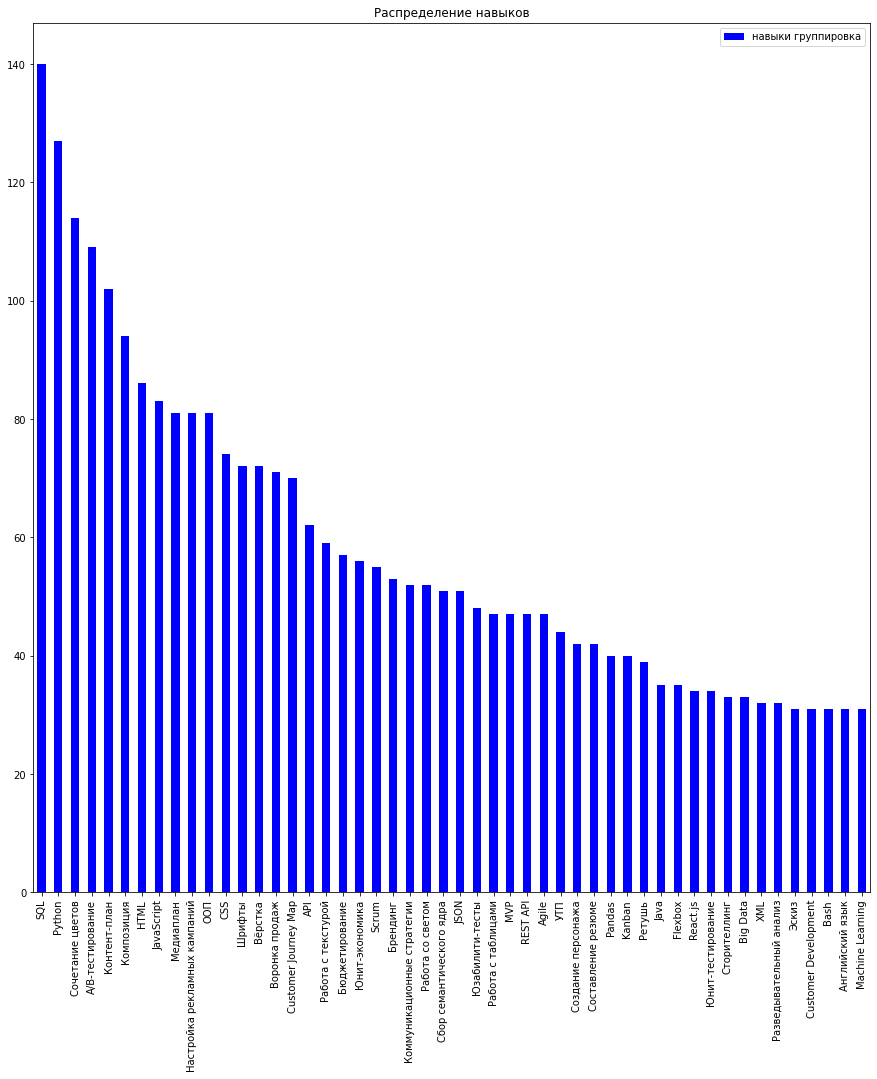

In [ ]:
skil=all_df[['skills1','skills2','skills3','skills4','skills5','skills6','skills7','skills8','skills9','skills10','skills11','skills12','skills13','skills14','skills15','skills16','skills17','skills18','skills19','skills20','skills21','skills22','skills23','skills24','skills25','skills26','skills27','skills28','skills29','skills30','skills31','skills32','skills33']].apply(pd.Series.value_counts)
skil['навыки группировка'] = skil.sum(axis=1)
sorted_dataset = skil.sort_values('навыки группировка',ascending=False)
sorted_dataset[['навыки группировка']].head(50).plot.bar( color='b',figsize=(15, 16), title="Распределение навыков")

####Кому

In [ ]:
all_df["komu"].value_counts()

Бэкенд-разработчикам                                                                                           48
Бэкенд-разработчикам,Веб-разработчикам,Фронтенд-разработчикам,Фулстек-разработчикам                            27
Бэкенд-разработчикам,Веб-разработчикам,Фулстек-разработчикам                                                   16
Аналитикам                                                                                                     14
Маркетологам,Предпринимателям                                                                                  14
                                                                                                               ..
Веб-дизайнерам,Веб-разработчикам,Предпринимателям                                                               1
Бэкенд-разработчикам,Разработчикам мобильных приложений                                                         1
Веб-разработчикам,Дизайнерам интерфейсов,Дизайнерам мобильных приложений,Разработчикам м

надо подумать, нужен ли этот пункт....


# АНАЛИЗ КАЖДОЙ КАТЕГОРИИ

In [ ]:
final_df

,name,name_school,price all,price sellary,kredit_v_monce,dlitelnost,tip_prof,ocenka,plus,minus,...,programm,napravleniya,tehnologii,soft_skills,name_all,Средняя цена за курсы,uroven_podgotovki1,uroven_podgotovki2,uroven_podgotovki3,uroven_podgotovki4
0,Профессия «С#-разработчик» от Skillbox,Skillbox,166750,125063,5685,12 месяцев,"Программирование,Backend-разработка,Frontend-р...",10/10,помощь в трудоустройстве; диплом; первый платё...,высокая стоимость (но помогает получить новую ...,...,NaN,Программирование,"3ds Max,ArchiCAD,Git,Microsoft Visual Studio,W...",NaN,Разработчик С#,166750.0,Новичкам,Практикующим программистам,None,None
1,Профессия «Fullstack-разработчик на JavaScript...,Skillbox,277860,166716,5378,12 месяцев,"Программирование,Frontend-разработка,Fullstack...",9/10,помощь в трудоустройстве; диплом; первый платё...,дорогой курс (но с хорошими перспективами в сф...,...,NaN,Программирование,"Adobe Photoshop,Figma,Git,MongoDB,MySQL,Rataty...",NaN,Fullstack разработчик,277860.0,NaN,NaN,NaN,NaN
2,Факультет информационной безопасности от GeekB...,GeekBrains,124500,0,0,24 месяца,"Программирование,Кибербезопасность",9.4/10,диплом помощь с трудоустройством доступ навсег...,высокая стоимость нет индивидуальных консультаций,...,"Безопасность веб-приложений. Базовый уровень,Б...","Программирование,Кибербезопасность","Docker,Linux,OAuth","Bash,CSS,HTML,IDOR,JavaScript,Metasploit frame...",Специалист по информационной безопасности,124500.0,Новичкам,Системным администраторам,None,None
3,Профессия «SEO-специалист с нуля до PRO» от Sk...,Skillbox,133000,79800,3627,18 месяцев,"Маркетинг,Поисковая оптимизация (seo)",9/10,диплом школы нет оплаты за уже пройденные блок...,высокая стоимость обучения,...,NaN,"Маркетинг,Поисковая оптимизация (seo)","Calltracking,Google Analytics,Google Search Co...","Flexbox,HTML,JavaScript,А/B-тестирование,Вёрст...",Специалист SEO,133000.0,Новичкам,Маркетологам,Владельцам бизнеса,None
4,Факультет продуктовой аналитики от GeekBrains,GeekBrains,175008,122496,5104,12 месяцев,"Аналитика,Аналитика данных,Бизнес-аналитика,Пр...",9/10,диплом портфолио нетворкинг гарантия трудоустр...,высокая стоимость нет индивидуальных консульта...,...,Введение в экономику продукта и маркетинговую ...,"Аналитика,Аналитика данных,Бизнес-аналитика,Пр...","CRM,Firebase,Google Analytics,Google Data Stud...","Big Data,Customer Development,Customer Journey...",Product Manager,175008.0,Новичкам,Менеджерам продукта,Веб-аналитикам,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,Профессия «Data scientist» от SkillFactory,SkillFactory,324000,178200,6900,24 месяца,"Программирование,Data Science",10/10,диплом портфолио упор на практику практика н...,высокая стоимость,...,"Основы,Python для анализа данных и machine lea...","Программирование,Data Science",Matplotlib,"API,Computer Vision,Deep Learning,HTML,Machine...",Data Scientist,324000.0,Новичкам,Программистам,Аналитикам,None
882,Факультет fullstack JavaScript от GeekBrains,GeekBrains,224500,168750,0,15 месяцев,"Программирование,Backend-разработка,Frontend-р...",10/10,диплом портфолио нетворкинг упор на практику к...,высокая стоимость,...,"HTML и CSS. Интерактивный курс,JavaScript. Уро...","Программирование,Алгоритмы и структуры данных,...","Docker,DOM,Figma,Git,Linux,MongoDB,MySQL,Postg...","Agile,API,CSS,Express.js,Flexbox,GraphQL,HTML,...",Fullstack разработчик,224500.0,Новичкам,Веб-разработчикам,None,None
883,Профессия «Разработчик на C++ с нуля» от Skillbox,Skillbox,193833,125991,5727,18 месяцев,"Программирование,Backend-разработка,Fullstack-...",10/10,помощь в трудоустройстве; первый платёж через ...,высокая стоимость (но оно того стоит).,...,NaN,"Программирование,Backend-разработка,Fullstack-...","Adobe Photoshop,Blueprints,Confluence,GDB,Git,...",C++,Разработчик С/C++,193833.0,Новичкам,Программистам,None,None
884,Профессия «Копирайтер PRO» от Skillbox,Skillbox,166882,91785,4172,24 месяца,"Маркетинг,Копирайтинг",10/10,диплом помощь в 

In [ ]:
final_df['ocenka'] = final_df['ocenka'].replace(r'/10',"",regex=True)
final_df[['ocenka']] = final_df[['ocenka']].astype(float)

In [ ]:
final_df['dlitelnost'] = final_df['dlitelnost'].str.replace(r"[^\d\.]", "", regex=True)
final_df[['dlitelnost']] = final_df[['dlitelnost']].astype(int)

In [ ]:
final_df.to_csv('Обработанный для дашборда.csv')